In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=  pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2=  pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3=  pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")


In [3]:
df = pd.concat([df1, df2, df3], ignore_index=True)


In [4]:
df.to_csv('uncleaned_aadhar_data.csv', index=False)

In [5]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [6]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1006029 non-null  datetime64[ns]
 1   state           1006029 non-null  object        
 2   district        1006029 non-null  object        
 3   pincode         1006029 non-null  int64         
 4   age_0_5         1006029 non-null  int64         
 5   age_5_17        1006029 non-null  int64         
 6   age_18_greater  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 53.7+ MB


In [8]:
df['total_daily_enrolement'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']

In [9]:
df.sample(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_daily_enrolement
769047,2025-11-16,Uttar Pradesh,Pratapgarh,230134,1,0,0,1
271789,2025-09-20,West Bengal,Paschim Medinipur,721443,4,1,0,5
438685,2025-10-19,Tamil Nadu,Namakkal,637017,1,0,0,1
111167,2025-09-09,Andhra Pradesh,Visakhapatnam,530051,3,0,0,3
948243,2025-12-26,Bihar,Siwan,841245,3,9,0,12


In [10]:
df = df.sort_values(by=['state', 'district'])


In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df = df[df['state'] != '100000']
df.head(5)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_daily_enrolement
8134,2025-09-01,Andaman & Nicobar Islands,Andamans,744101,0,1,0,1
17750,2025-09-01,Andaman & Nicobar Islands,Andamans,744107,1,0,0,1
27095,2025-09-02,Andaman & Nicobar Islands,Andamans,744107,1,0,0,1
50253,2025-09-04,Andaman & Nicobar Islands,Andamans,744103,1,0,0,1
50254,2025-09-04,Andaman & Nicobar Islands,Andamans,744105,1,0,0,1


In [13]:
df['total_daily_enrolement'].mean()


np.float64(5.4030280107394875)

In [14]:
num_states = df['state'].nunique()
num_districts = df['district'].nunique()
num_pincodes = df['pincode'].nunique()

print(f"Unique States   : {num_states}")
print(f"Unique Districts: {num_districts}")
print(f"Unique Pincodes : {num_pincodes}")

Unique States   : 54
Unique Districts: 984
Unique Pincodes : 19462


In [15]:
import pandas as pd

# Create summary DataFrame
raw_summary = pd.DataFrame({
    "Metric": [
        "Unique States and Union Territories",
        "Unique Districts",
        "Unique Pincodes",
    ],
    "Value": [
        num_states,
        num_districts,
        num_pincodes,
    ]
})

# Display heading
display(pd.DataFrame({"": ["Before Cleaning"]}).style
        .set_properties(**{
            "font-size": "18px",
            "font-weight": "bold",
            "text-align": "center"
        })
        .hide(axis="index")
        .hide(axis="columns")
)

# Style the table in orange
raw_summary.style \
    .set_caption("Before Cleaning") \
    .set_table_styles([
        {
            "selector": "caption",
            "props": [
                ("caption-side", "top"),
                ("font-size", "16px"),
                ("font-weight", "bold"),
                ("color", "#FF6F2A")  # orange
            ]
        },
        {
            "selector": "th",
            "props": [
                ("background-color", "#FF6E26"),
                ("color", "white"),
                ("font-weight", "bold"),
                ("text-align", "left")
            ]
        },
        {
            "selector": "td",
            "props": [
                ("background-color", "#FFE4D7"),
                ("color", "#FF6F2A"),
                ("font-weight", "semibold"),
                ("text-align", "left")
            ]
        }
    ]) \
    .format({"Value": "{:,}"})



Before Cleaning


,Metric,Value
0,Unique States and Union Territories,54
1,Unique Districts,984
2,Unique Pincodes,"19,462"


In [16]:
df.groupby('state')['total_daily_enrolement'].sum().sort_values(ascending=False)



state
Uttar Pradesh                                   1018629
Bihar                                            609585
Madhya Pradesh                                   493970
West Bengal                                      375297
Maharashtra                                      369139
Rajasthan                                        348458
Gujarat                                          280549
Assam                                            230197
Karnataka                                        223235
Tamil Nadu                                       220789
Jharkhand                                        157539
Telangana                                        131574
Andhra Pradesh                                   127681
Odisha                                           118837
Meghalaya                                        109771
Chhattisgarh                                     103219
Haryana                                           98252
Delhi                                     

In [17]:
state_map = {
    # West Bengal
    "WEST BENGAL": "West Bengal",
    "WESTBENGAL": "West Bengal",
    "West Bangal": "West Bengal",
    "West bengal": "West Bengal",
    "west Bengal": "West Bengal",
    "Westbengal": "West Bengal",
    "West  Bengal" : "West Bengal",
    # Odisha
    "ODISHA": "Odisha",
    "Orissa": "Odisha",

    # Andhra Pradesh
    "andhra pradesh": "Andhra Pradesh",

    # J&K
    "Jammu & Kashmir": "Jammu and Kashmir",
    "Jammu And Kashmir": "Jammu and Kashmir",

    # UT merge
    "Dadra & Nagar Haveli": "DNH and Daman and Diu",
    "Dadra and Nagar Haveli": "DNH and Daman and Diu",
    "Daman & Diu": "DNH and Daman and Diu",
    "Daman and Diu": "DNH and Daman and Diu",
    "The Dadra And Nagar Haveli And Daman And Diu": "DNH and Daman and Diu",
     "Dadra and Nagar Haveli and Daman and Diu"   :"DNH and Daman and Diu" ,
    # Puducherry
    "Pondicherry": "Puducherry",

    "Andaman & Nicobar Islands" : "Andaman and Nicobar Islands",
}       

df["state"] = df["state"].replace(state_map)


In [18]:
df['day_name'] = df['date'].dt.day_name()


In [19]:
df.groupby('state')['total_daily_enrolement'].sum().sort_values(ascending=False)



state
Uttar Pradesh                  1018629
Bihar                           609585
Madhya Pradesh                  493970
West Bengal                     375340
Maharashtra                     369139
Rajasthan                       348458
Gujarat                         280549
Assam                           230197
Karnataka                       223235
Tamil Nadu                      220789
Jharkhand                       157539
Telangana                       131574
Andhra Pradesh                  127686
Odisha                          122987
Meghalaya                       109771
Chhattisgarh                    103219
Haryana                          98252
Delhi                            94529
Punjab                           76746
Kerala                           75002
Jammu and Kashmir                49096
Uttarakhand                      37698
Himachal Pradesh                 17486
Nagaland                         15587
Manipur                          13456
Tripura            

In [20]:
df['district']= df['district'].str.lower()

In [21]:
total_districts = df['district'].nunique()
total_districts

964

In [22]:
unique_districts_sorted = sorted(df['district'].dropna().unique())
unique_districts_sorted

['24 paraganas north',
 '24 paraganas south',
 'adilabad',
 'agar malwa',
 'agra',
 'ahilyanagar',
 'ahmadabad',
 'ahmadnagar',
 'ahmed nagar',
 'ahmedabad',
 'ahmednagar',
 'aizawl',
 'ajmer',
 'akola',
 'alappuzha',
 'aligarh',
 'alipurduar',
 'alirajpur',
 'allahabad',
 'alluri sitharama raju',
 'almora',
 'alwar',
 'ambala',
 'ambedkar nagar',
 'amethi',
 'amravati',
 'amreli',
 'amritsar',
 'amroha',
 'anakapalli',
 'anand',
 'anantapur',
 'ananthapur',
 'ananthapuramu',
 'anantnag',
 'andamans',
 'angul',
 'anjaw',
 'annamayya',
 'anugal',
 'anugul',
 'anuppur',
 'araria',
 'ariyalur',
 'arvalli',
 'arwal',
 'ashok nagar',
 'ashoknagar',
 'auraiya',
 'aurangabad',
 'aurangabad(bh)',
 'ayodhya',
 'azamgarh',
 'badgam',
 'bagalkot',
 'bagalkot *',
 'bageshwar',
 'baghpat',
 'bagpat',
 'bahraich',
 'bajali',
 'baksa',
 'balaghat',
 'balangir',
 'baleshwar',
 'baleswar',
 'ballari',
 'ballia',
 'balod',
 'baloda bazar',
 'balotra',
 'balrampur',
 'banas kantha',
 'banaskantha',
 'ban

In [23]:
district_mapping = {
    # Yamuna Nagar
    "yamuna nagar": "Yamuna Nagar",
    "yamunanagar": "Yamuna Nagar",

    # Washim
    "washim": "Washim",
    "washim *": "Washim",

    # Warangal Urban
    "warangal urban": "Warangal Urban",
    "warangal (urban)": "Warangal Urban",

    # Visakhapatnam
    "visakhapatanam": "Visakhapatnam",
    "visakhapatnam": "Visakhapatnam",

    # Villupuram
    "villupuram": "Villupuram",
    "viluppuram": "Villupuram",

    # South 24 Parganas
    "south 24 pargana": "South 24 Parganas",
    "south 24 parganas": "South 24 Parganas",
    "south twenty four parganas": "South 24 Parganas",

    # North 24 Parganas
    "24 paraganas north": "North 24 Parganas",
    "north 24 parganas": "North 24 Parganas",
    "north twenty four parganas": "North 24 Parganas",

    # Ahmedabad
    "ahmadabad": "Ahmedabad",
    "ahmedabad": "Ahmedabad",

    # Ahmednagar
    "ahmadnagar": "Ahmednagar",
    "ahmed nagar": "Ahmednagar",
    "ahmednagar": "Ahmednagar",

    # Anantapur
    "anantapur": "Anantapur",
    "ananthapur": "Anantapur",
    "ananthapuramu": "Anantapur",

    # Bagalkot
    "bagalkot": "Bagalkot",
    "bagalkot *": "Bagalkot",

    # Baleshwar
    "baleshwar": "Baleshwar",
    "baleswar": "Baleshwar",

    # Bangalore / Bengaluru
    "bangalore": "Bengaluru",
    "bengaluru": "Bengaluru",

    # Bellary
    "ballari": "Bellary",
    "bellary": "Bellary",

    # Bokaro
    "bokaro": "Bokaro",
    "bokaro *": "Bokaro",

    # Bulandshahr
    "bulandshahar": "Bulandshahr",
    "bulandshahr": "Bulandshahr",

    # Buldhana
    "buldana": "Buldhana",
    "buldhana": "Buldhana",

    # Burdwan
    "barddhaman": "Burdwan",
    "bardhaman": "Burdwan",
    "burdwan": "Burdwan",

    # Chamarajanagar
    "chamarajanagar": "Chamarajanagar",
    "chamrajanagar": "Chamarajanagar",
    "chamrajnagar": "Chamarajanagar",
    "chamarajanagar *": "Chamarajanagar",

    # Chikkamagaluru
    "chickmagalur": "Chikkamagaluru",
    "chikmagalur": "Chikkamagaluru",
    "chikkamagaluru": "Chikkamagaluru",

    # Chittorgarh
    "chittaurgarh": "Chittorgarh",
    "chittorgarh": "Chittorgarh",

    # Cooch Behar
    "cooch behar": "Cooch Behar",
    "coochbehar": "Cooch Behar",
    "koch bihar": "Cooch Behar",

    # Dadra & Nagar Haveli
    "dadra & nagar haveli": "Dadra and Nagar Haveli",
    "dadra and nagar haveli": "Dadra and Nagar Haveli",

    # Darjeeling
    "darjeeling": "Darjeeling",
    "darjiling": "Darjeeling",

    # Deeg
    "deeg": "Deeg",
    "deeg ": "Deeg",

    # Gondia
    "gondia": "Gondia",
    "gondiya": "Gondia",
    "gondiya *": "Gondia",

    # Gurgaon
    "gurgaon": "Gurugram",
    "gurugram": "Gurugram",

    # Haridwar
    "hardwar": "Haridwar",
    "haridwar": "Haridwar",

    # Hassan
    "hasan": "Hassan",
    "hassan": "Hassan",

    # Hazaribagh
    "hazaribag": "Hazaribagh",
    "hazaribagh": "Hazaribagh",

    # Hooghly
    "hooghiy": "Hooghly",
    "hooghly": "Hooghly",
    "hugli": "Hooghly",

    # Jajpur
    "jajapur": "Jajpur",
    "jajpur": "Jajpur",

    # Jhunjhunu
    "jhunjhunu": "Jhunjhunu",
    "jhunjhunun": "Jhunjhunu",

    # Karimnagar
    "karim nagar": "Karimnagar",
    "karimnagar": "Karimnagar",

    # Kasargod
    "kasaragod": "Kasargod",
    "kasargod": "Kasargod",

    # Kodarma
    "kodarma": "Koderma",
    "koderma": "Koderma",

    # Kushinagar
    "kushi nagar": "Kushinagar",
    "kushinagar": "Kushinagar",
    "kushinagar *": "Kushinagar",

    # Mahbubnagar
    "mahabub nagar": "Mahbubnagar",
    "mahabubnagar": "Mahbubnagar",
    "mahbubnagar": "Mahbubnagar",

    # Malda
    "malda": "Malda",
    "maldah": "Malda",

    # Mamit
    "mammit": "Mamit",
    "mamit": "Mamit",

    # Namakkal
    "namakkal": "Namakkal",
    "namakkal *": "Namakkal",

    # Nicobar
    "nicobar": "Nicobar",
    "nicobars": "Nicobar",

    # Osmanabad / Dharashiv
    "osmanabad": "Dharashiv",
    "dharashiv": "Dharashiv",

    # Panchmahals
    "panch mahals": "Panchmahals",
    "panchmahals": "Panchmahals",

    # Purnia
    "purnea": "Purnia",
    "purnia": "Purnia",

    # Purulia
    "puruliya": "Purulia",
    "purulia": "Purulia",

    # Raebareli
    "rae bareli": "Raebareli",
    "raebareli": "Raebareli",

    # Rangareddy
    "ranga reddy": "Rangareddy",
    "rangareddi": "Rangareddy",
    "rangareddy": "Rangareddy",
    "k.v. rangareddy": "Rangareddy",
    "k.v.rangareddy": "Rangareddy",

    # Sheikhpura
    "sheikhpura": "Sheikhpura",
    "sheikpura": "Sheikhpura",

    # Shravasti
    "shrawasti": "Shravasti",
    "shravasti": "Shravasti",

    # Siddharthnagar
    "siddharth nagar": "Siddharthnagar",
    "siddharthnagar": "Siddharthnagar",

    # Sivasagar
    "sibsagar": "Sivasagar",
    "sivasagar": "Sivasagar",

    # Surendranagar
    "surendra nagar": "Surendranagar",
    "surendranagar": "Surendranagar",

    # Thoothukkudi
    "thoothukkudi": "Thoothukkudi",
    "tuticorin": "Thoothukkudi",

    # Tiruvallur
    "thiruvallur": "Tiruvallur",
    "tiruvallur": "Tiruvallur",

    # Tiruvarur
    "thiruvarur": "Tiruvarur",
    "tiruvarur": "Tiruvarur",

    # Tumakuru
    "tumakuru": "Tumakuru",
    "tumkur": "Tumakuru",

    # Udupi
    "udupi": "Udupi",
    "udupi *": "Udupi",
}
review_only_districts = {
    "baloda bazar",        # not same as Balod
    "garhwal",             # ambiguous (not a district alone)
    "east",
    "west",
    "north",
    "south",
}
df['district_original'] = df['district']

df['district_clean'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(district_mapping)
)


In [24]:
sorted(df['district_clean'].unique())

['24 paraganas south',
 'Ahmedabad',
 'Ahmednagar',
 'Anantapur',
 'Bagalkot',
 'Baleshwar',
 'Bellary',
 'Bengaluru',
 'Bokaro',
 'Bulandshahr',
 'Buldhana',
 'Burdwan',
 'Chamarajanagar',
 'Chikkamagaluru',
 'Chittorgarh',
 'Cooch Behar',
 'Dadra and Nagar Haveli',
 'Darjeeling',
 'Deeg',
 'Dharashiv',
 'Gondia',
 'Gurugram',
 'Haridwar',
 'Hassan',
 'Hazaribagh',
 'Hooghly',
 'Jajpur',
 'Jhunjhunu',
 'Karimnagar',
 'Kasargod',
 'Koderma',
 'Kushinagar',
 'Mahbubnagar',
 'Malda',
 'Mamit',
 'Namakkal',
 'Nicobar',
 'North 24 Parganas',
 'Panchmahals',
 'Purnia',
 'Purulia',
 'Raebareli',
 'Rangareddy',
 'Sheikhpura',
 'Shravasti',
 'Siddharthnagar',
 'Sivasagar',
 'South 24 Parganas',
 'Surendranagar',
 'Thoothukkudi',
 'Tiruvallur',
 'Tiruvarur',
 'Tumakuru',
 'Udupi',
 'Villupuram',
 'Visakhapatnam',
 'Warangal Urban',
 'Washim',
 'Yamuna Nagar',
 'adilabad',
 'agar malwa',
 'agra',
 'ahilyanagar',
 'aizawl',
 'ajmer',
 'akola',
 'alappuzha',
 'aligarh',
 'alipurduar',
 'alirajpur'

In [25]:

# Anugul
df.loc[df['district_clean'].isin(['anugal', 'anugul']), 'district_clean'] = 'Anugul'

# Ashok Nagar
df.loc[df['district_clean'].isin(['ashok nagar', 'ashoknagar']), 'district_clean'] = 'Ashok Nagar'

# Aurangabad (Bihar)
df.loc[df['district_clean'].isin(['aurangabad', 'aurangabad(bh)']), 'district_clean'] = 'Aurangabad (Bihar)'

# Banaskantha
df.loc[df['district_clean'].isin(['banas kantha', 'banaskantha']), 'district_clean'] = 'Banaskantha'

# Barabanki
df.loc[df['district_clean'].isin(['bara banki', 'barabanki']), 'district_clean'] = 'Barabanki'

# Bijapur (Karnataka)
df.loc[df['district_clean'].isin(['bijapur', 'bijapur(kar)']), 'district_clean'] = 'Bijapur (Karnataka)'
# Baghpat
df.loc[df['district_clean'].isin(['baghpat', 'bagpat']), 'district_clean'] = 'Baghpat'
# Davanagere
df.loc[df['district_clean'].isin(['davanagere', 'davangere']), 'district_clean'] = 'Davanagere'

# Dhalai
df.loc[df['district_clean'].isin(['dhalai', 'dhalai *']), 'district_clean'] = 'Dhalai'

# Garhwa
df.loc[df['district_clean'].isin(['garhwa', 'garhwa *']), 'district_clean'] = 'Garhwa'

# Gaurela–Pendra–Marwahi
df.loc[
    df['district_clean'].isin([
        'gaurela-pendra-marwahi',
        'gaurella pendra marwahi'
    ]),
    'district_clean'
] = 'Gaurela–Pendra–Marwahi'

# Gurgaon / Gurugram
df.loc[df['district_clean'].isin(['gurgaon', 'gurugram']), 'district_clean'] = 'Gurugram'

# Harda
df.loc[df['district_clean'].isin(['harda', 'harda *']), 'district_clean'] = 'Harda'

# Haveri
df.loc[df['district_clean'].isin(['haveri', 'haveri *']), 'district_clean'] = 'Haveri'

# Hingoli
df.loc[df['district_clean'].isin(['hingoli', 'hingoli *']), 'district_clean'] = 'Hingoli'

# Jagatsinghpur
df.loc[df['district_clean'].isin(['jagatsinghapur', 'jagatsinghpur']), 'district_clean'] = 'Jagatsinghpur'

# Jangaon
df.loc[df['district_clean'].isin(['jangaon', 'jangoan']), 'district_clean'] = 'Jangaon'

# Janjgir–Champa
df.loc[
    df['district_clean'].isin([
        'janjgir - champa',
        'janjgir champa',
        'janjgir-champa'
    ]),
    'district_clean'
] = 'Janjgir–Champa'

# Jalor
df.loc[df['district_clean'].isin(['jalor', 'jalore']), 'district_clean'] = 'Jalor'

# Khordha
df.loc[df['district_clean'].isin(['khorda', 'khordha']), 'district_clean'] = 'Khordha'

# Koderma
df.loc[df['district_clean'].isin(['koderma', 'kodarma']), 'district_clean'] = 'Koderma'

# Lahaul & Spiti
df.loc[
    df['district_clean'].isin([
        'lahaul and spiti',
        'lahul & spiti',
        'lahul and spiti'
    ]),
    'district_clean'
] = 'Lahaul & Spiti'

# Medchal–Malkajgiri
df.loc[
    df['district_clean'].isin([
        'medchal malkajgiri',
        'medchal-malkajgiri',
        'medchal?malkajgiri',
        'medchal−malkajgiri'
    ]),
    'district_clean'
] = 'Medchal–Malkajgiri'

# Mumbai Suburban
df.loc[df['district_clean'].isin(['mumbai suburban', 'mumbai( sub urban )']), 'district_clean'] = 'Mumbai Suburban'

# Nabarangpur
df.loc[df['district_clean'].isin(['nabarangapur', 'nabarangpur']), 'district_clean'] = 'Nabarangpur'

# Namakkal
df.loc[df['district_clean'].isin(['namakkal', 'namakkal *']), 'district_clean'] = 'Namakkal'

# Nandurbar
df.loc[df['district_clean'].isin(['nandurbar', 'nandurbar *']), 'district_clean'] = 'Nandurbar'

# Pakur
df.loc[df['district_clean'].isin(['pakur', 'pakaur']), 'district_clean'] = 'Pakur'

# Palamu
df.loc[df['district_clean'].isin(['palamu', 'palamau']), 'district_clean'] = 'Palamu'

# Ramanagara
df.loc[df['district_clean'].isin(['ramanagar', 'ramanagara']), 'district_clean'] = 'Ramanagara'

# Rangareddy
df.loc[df['district_clean'].isin(['rangareddy', 'rangareddi']), 'district_clean'] = 'Rangareddy'

# Sabarkantha
df.loc[df['district_clean'].isin(['sabar kantha', 'sabarkantha']), 'district_clean'] = 'Sabarkantha'

# Samastipur
df.loc[df['district_clean'].isin(['samastipur', 'samstipur']), 'district_clean'] = 'Samastipur'

# Sheikhpura
df.loc[df['district_clean'].isin(['sheikhpura', 'sheikpura']), 'district_clean'] = 'Sheikhpura'

# Shupiyan / Shopian
df.loc[df['district_clean'].isin(['shopian', 'shupiyan']), 'district_clean'] = 'Shopian'

# Sundargarh
df.loc[df['district_clean'].isin(['sundargarh', 'sundergarh']), 'district_clean'] = 'Sundargarh'

# Thoothukkudi
df.loc[df['district_clean'].isin(['thoothukkudi', 'tuticorin']), 'district_clean'] = 'Thoothukkudi'

# Tumakuru
df.loc[df['district_clean'].isin(['tumakuru', 'tumkur']), 'district_clean'] = 'Tumakuru'

# Udupi
df.loc[df['district_clean'].isin(['udupi', 'udupi *']), 'district_clean'] = 'Udupi'

In [26]:
review_only_districts = {
    "baloda bazar",
    "garhwal",
    "east",
    "west",
    "north",
    "south",
}

before_rows = df.shape[0]

df = df[~df['district_clean'].isin(review_only_districts)].reset_index(drop=True)

after_rows = df.shape[0]

In [27]:

df.loc[
    df['district_clean'].isin(['east singhbhum', 'east singhbum']),
    'district_clean'
] = 'East Singhbhum'
df.loc[
    df['district_clean'].isin(['firozpur', 'ferozepur']),
    'district_clean'
] = 'Firozpur'

df.loc[df['district_clean'].isin(['dhalai *', 'dhalai  *']),'district_clean'] = 'Dhalai'
df.loc[df['district_clean'].isin(['gadag', 'gadag *']),'district_clean'] = 'Gadag'
df.loc[df['district_clean'].isin(['jhajjar', 'jhajjar *']),'district_clean'] = 'Jhajjar'
df.loc[df['district_clean'].isin(['kendrapara', 'kendrapara *']),'district_clean'] = 'Kendrapara'
df.loc[df['district_clean'].isin(['leh', 'leh (ladakh)']),'district_clean'] = 'Leh'
df.loc[df['district_clean'].isin(['north east', 'north east   *']),'district_clean'] = 'north east'

df.loc[

df['district_clean'].isin(['s.a.s nagar', 's.a.s nagar(mohali)']),
    'district_clean'
] = 'S.A.S Nagar'


In [28]:
df['district_clean'] = (
    df['district_clean']
    .str.lower()
    .str.strip()
    .str.replace(r'\*+', '', regex=True)
    .str.replace(r'\.+$', '', regex=True)
    .str.replace(r'\s*\.\s*', ' ', regex=True)
    .str.replace(r'[–—−]', '-', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
)


In [29]:
DISTRICT_CANONICAL_MAP = {

    # -------- Odisha --------
    'angul': 'Angul',
    'anugul': 'Angul',

    # -------- Karnataka --------
    'belagavi': 'Belagavi',
    'belgaum': 'Belagavi',
    'bid': 'Beed',
    'beed': 'Beed',
    'gulbarga': 'Kalaburagi',
    'kalaburagi': 'Kalaburagi',
    'mysore': 'Mysuru',
    'mysuru': 'Mysuru',
    'bijapur': 'Vijayapura',
    'bijapur (karnataka)': 'Vijayapura',
    'vijayapura': 'Vijayapura',

    # -------- Uttar Pradesh --------
    'allahabad': 'Prayagraj',
    'prayagraj': 'Prayagraj',
    'faizabad': 'Ayodhya',
    'ayodhya': 'Ayodhya',

    # -------- Bihar --------
    'bhabua': 'Kaimur (Bhabua)',
    'kaimur': 'Kaimur (Bhabua)',
    'kaimur (bhabua)': 'Kaimur (Bhabua)',

    # -------- West Bengal --------
    'east midnapore': 'East Medinipur',
    'east midnapur': 'East Medinipur',
    'purba medinipur': 'East Medinipur',
    'west midnapore': 'West Medinipur',
    'west medinipur': 'West Medinipur',
    'paschim medinipur': 'West Medinipur',
    '24 paraganas south': 'South 24 Parganas',
    'south 24 parganas': 'South 24 Parganas',
    'north 24 parganas': 'North 24 Parganas',

    # -------- Maharashtra --------
    'aurangabad': 'Chhatrapati Sambhajinagar',
    'chatrapati sambhaji nagar': 'Chhatrapati Sambhajinagar',
    'chhatrapati sambhajinagar': 'Chhatrapati Sambhajinagar',
    'raigarh': 'Raigarh (MH)',
    'raigarh(mh)': 'Raigarh (MH)',

    # -------- Madhya Pradesh --------
    'narsimhapur': 'Narsinghpur',
    'narsinghpur': 'Narsinghpur',
    'hoshangabad': 'Narmadapuram',
    'narmadapuram': 'Narmadapuram',

    # -------- Haryana --------
    'mewat': 'Nuh',
    'nuh': 'Nuh',

    # -------- Andhra Pradesh --------
    'n t r': 'NTR',
    'n.t.r': 'NTR',
    'ntr': 'NTR',
    'y s r': 'YSR',
    'y.s.r': 'YSR',
    'ysr': 'YSR Kadapa',

    # -------- New districts --------
    'didwana-kuchaman': 'Didwana-Kuchaman',
    'gaurela-pendra-marwahi': 'Gaurela-Pendra-Marwahi',
    'mohalla-manpur-ambagarh chowki': 'Mohla-Manpur-Ambagarh Chowki',
    'mohla-manpur-ambagarh chouki': 'Mohla-Manpur-Ambagarh Chowki',

    # -------- Special wording --------
    'lahaul & spiti': 'Lahaul and Spiti',
    'the dangs': 'Dang',
    'the nilgiris': 'Nilgiris',
    's a s nagar': 'SAS Nagar',
    'sas nagar (mohali)': 'SAS Nagar'
}


In [30]:
df['district_clean'] = (
    df['district_clean']
    .map(DISTRICT_CANONICAL_MAP)
    .fillna(df['district_clean'])
)


In [31]:
district_name_mapping = {
    # Odisha
    "baudh": "boudh",
    "boudh": "boudh",

    # Jammu & Kashmir
    "badgam": "budgam",
    "budgam": "budgam",

    # Karnataka
    "bangalore rural": "bengaluru rural",
    "bengaluru rural": "bengaluru rural",

    "bellary": "ballari",
    "ballari": "ballari",

    "shimoga": "shivamogga",
    "shivamogga": "shivamogga",

    # Andhra Pradesh
    "cuddapah": "kadapa",
    "kadapa": "kadapa",

    "nellore": "sri potti sriramulu nellore",
    "spsr nellore": "sri potti sriramulu nellore",
    "sri potti sriramulu nellore": "sri potti sriramulu nellore",

    "tirupathur": "tirupattur",
    "tirupattur": "tirupattur",

    # West Bengal
    "haora": "howrah",
    "hawrah": "howrah",
    "howrah": "howrah",

      # REMOVE (invalid standalone)
    "east medinipur": "east medinipur",
    "west medinipur": "west medinipur",

    "north dinajpur": "uttar dinajpur",
    "uttar dinajpur": "uttar dinajpur",

    # Tamil Nadu
    "kancheepuram": "kanchipuram",
    "kanchipuram": "kanchipuram",

    "kanyakumari": "kanniyakumari",
    "kanniyakumari": "kanniyakumari",

    # Bihar
    "monghyr": "munger",
    "munger": "munger",

    "purbi champaran": "purba champaran",
    "purba champaran": "purba champaran",

    # Jammu & Kashmir
    "rajauri": "rajouri",
    "rajouri": "rajouri",

    # Uttar Pradesh
    "sant ravidas nagar": "bhadohi",
    "sant ravidas nagar bhadohi": "bhadohi",
    "bhadohi": "bhadohi",

    # Ambiguous (STATE REQUIRED)
    "pratapgarh": "pratapgarh"  # requires state resolution (UP / Rajasthan)
}


In [32]:
df['district_clean'] = (
    df['district_clean']
    .map(district_name_mapping)
    .fillna(df['district_clean'])
)


In [33]:
district_old_to_new_mapping = {
    # Uttar Pradesh
    "allahabad": "prayagraj",
    "faizabad": "ayodhya",

    # Maharashtra
    "aurangabad": "chhatrapati sambhajinagar",  # MH only
    "ahmednagar": "ahilyanagar",

    # Karnataka
    "mysore": "mysuru",
    "mysuru": "mysuru",

    # Odisha (Orissa → Odisha spellings)
    "orissa": "odisha",  # state-level normalization (if present)

    # District spellings corrected under Odisha
    "kendujhar": "kendujhar",      # correct (formerly keonjhar)
    "keonjhar": "kendujhar",

    "balangir": "balangir",        # correct (formerly bolangir)
    "bolangir": "balangir",

    "subarnapur": "subarnapur",    # correct (formerly sonepur)
    "sonepur": "subarnapur",

    "jagatsinghpur": "jagatsinghpur",
    "jagatsinghapur": "jagatsinghpur"
}


In [34]:
df['district_clean'] = (
    df['district_clean']
    .map(district_old_to_new_mapping)
    .fillna(df['district_clean'])
)


In [35]:
# pd.DataFrame(sorted(df['district_clean'].str.lower().str.strip().unique()))


In [36]:
df.shape

(1004432, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004432 entries, 0 to 1004431
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1004432 non-null  datetime64[ns]
 1   state                   1004432 non-null  object        
 2   district                1004432 non-null  object        
 3   pincode                 1004432 non-null  int64         
 4   age_0_5                 1004432 non-null  int64         
 5   age_5_17                1004432 non-null  int64         
 6   age_18_greater          1004432 non-null  int64         
 7   total_daily_enrolement  1004432 non-null  int64         
 8   day_name                1004432 non-null  object        
 9   district_original       1004432 non-null  object        
 10  district_clean          1004432 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 84.3+ MB


In [38]:
df['district_clean'] = df['district_clean'].str.strip().str.lower()

In [39]:
df.drop(columns=["district_original", "district"], inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004432 entries, 0 to 1004431
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1004432 non-null  datetime64[ns]
 1   state                   1004432 non-null  object        
 2   pincode                 1004432 non-null  int64         
 3   age_0_5                 1004432 non-null  int64         
 4   age_5_17                1004432 non-null  int64         
 5   age_18_greater          1004432 non-null  int64         
 6   total_daily_enrolement  1004432 non-null  int64         
 7   day_name                1004432 non-null  object        
 8   district_clean          1004432 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 69.0+ MB


In [41]:
df.rename(columns={'district_clean':'district'}, inplace=True)

In [42]:
total_districts_final = df['district'].nunique()
total_districts_final

801

In [43]:
df.shape

(1004432, 9)

In [44]:
cols = list(df.columns)
cols.insert(3, cols.pop(cols.index("district")))
df = df[cols]

# Over view Page

### Im Aadhaar Enrolment Analytics – Project Overview

This project focuses on **pan-India analysis of Aadhaar enrolment activity** using UIDAI enrolment data.
Unlike most analyses that are limited to a single state, this dataset was **programmatically collected and combined for all states**.

#### Objectives:
- Understand nationwide enrolment patterns
- Identify demographic and geographic trends
- Perform coverage-aware analysis accounting for irregular reporting
- Build an interactive analytics dashboard for policy-relevant insights

> ⚠️ Note: The dataset contains only *reported records*.  
> Missing dates or locations indicate non-reporting and **do not imply zero enrolment**.


In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from typing import Tuple


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004432 entries, 0 to 1004431
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1004432 non-null  datetime64[ns]
 1   state                   1004432 non-null  object        
 2   pincode                 1004432 non-null  int64         
 3   district                1004432 non-null  object        
 4   age_0_5                 1004432 non-null  int64         
 5   age_5_17                1004432 non-null  int64         
 6   age_18_greater          1004432 non-null  int64         
 7   total_daily_enrolement  1004432 non-null  int64         
 8   day_name                1004432 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 69.0+ MB


In [47]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt

from typing import Dict



In [48]:
def standardize_state_names(
    df: pd.DataFrame,
    state_col: str = "state"
) -> pd.DataFrame:
    """
    Standardizes state names by:
    - Lowercasing
    - Trimming whitespace
    - Applying canonical naming where required
    
    Returns a copy of the DataFrame with a new column: 'state_clean'
    """
    
    state_mapping: Dict[str, str] = {
        # Examples (extend if needed)
        "andhra pradesh": "Andhra Pradesh",
        "arunachal pradesh": "Arunachal Pradesh",
        "assam": "Assam",
        "bihar": "Bihar",
        "chhattisgarh": "Chhattisgarh",
        "delhi": "Delhi",
        "goa": "Goa",
        "gujarat": "Gujarat",
        "haryana": "Haryana",
        "himachal pradesh": "Himachal Pradesh",
        "jharkhand": "Jharkhand",
        "karnataka": "Karnataka",
        "kerala": "Kerala",
        "madhya pradesh": "Madhya Pradesh",
        "maharashtra": "Maharashtra",
        "odisha": "Odisha",
        "punjab": "Punjab",
        "rajasthan": "Rajasthan",
        "tamil nadu": "Tamil Nadu",
        "telangana": "Telangana",
        "uttar pradesh": "Uttar Pradesh",
        "uttarakhand": "Uttarakhand",
        "west bengal": "West Bengal",
        "ladakh": "Ladakh",
        "jammu and kashmir": "Jammu and Kashmir"
    }
    
    df = df.copy()
    
    df["state_clean"] = (
        df[state_col]
        .astype(str)
        .str.lower()
        .str.strip()
        .map(state_mapping)
    )
    
    return df


In [49]:
def aggregate_state_average_daily_enrolment(
    df: pd.DataFrame,
    date_col: str = "date",
    enrol_col: str = "total_daily_enrolement"
) -> pd.DataFrame:
    """
    Aggregates Aadhaar enrolment data to the state level.

    Computes:
    - Total enrolment per state
    - Number of reporting days per state
    - Average daily enrolment (coverage-aware)

    Missing dates are NOT treated as zero.
    """
    
    grouped = (
        df
        .groupby("state_clean")
        .agg(
            total_enrolment=(enrol_col, "sum"),
            reporting_days=(date_col, "nunique")
        )
        .reset_index()
    )
    
    grouped["avg_daily_enrolment"] = (
        grouped["total_enrolment"] / grouped["reporting_days"]
    )
    
    return grouped


In [50]:
def load_india_state_boundaries(
    geojson_path: str,
    state_name_col: str = "ST_NM"
) -> gpd.GeoDataFrame:
    """
    Loads India state boundary GeoJSON and standardizes state names.
    """
    
    gdf = gpd.read_file(geojson_path)
    
    gdf["state_clean"] = (
        gdf[state_name_col]
        .astype(str)
        .str.strip()
    )
    
    return gdf


In [51]:
def merge_enrolment_with_geometry(
    gdf_states: gpd.GeoDataFrame,
    enrol_df: pd.DataFrame
) -> gpd.GeoDataFrame:
    """
    Left-joins enrolment metrics to state geometry.
    
    States with no enrolment data remain NaN (non-reporting),
    NOT force-filled with zero.
    """
    
    merged = gdf_states.merge(
        enrol_df,
        on="state_clean",
        how="left"
    )
    
    return merged


In [52]:
def sanity_checks(
    geo_enrol_gdf: gpd.GeoDataFrame
):
    print("Total states in boundary file:", geo_enrol_gdf.shape[0])
    print(
        "States with enrolment data:",
        geo_enrol_gdf["avg_daily_enrolment"].notna().sum()
    )
    print(
        "States without reported enrolment:",
        geo_enrol_gdf["avg_daily_enrolment"].isna().sum()
    )


In [53]:
def plot_india_state_enrolment_map(
    geo_enrol_gdf: gpd.GeoDataFrame,
    value_col: str = "avg_daily_enrolment"
):
    """
    Plots a static India-level choropleth showing
    average daily Aadhaar enrolment by state.
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 12))
    
    geo_enrol_gdf.plot(
        column=value_col,
        cmap="viridis",
        linewidth=0.6,
        edgecolor="black",
        legend=True,
        missing_kwds={
            "color": "lightgrey",
            "label": "No Reporting Data"
        },
        ax=ax
    )
    
    ax.set_title(
        "Average Daily Aadhaar Enrolment by State (Coverage-Aware)",
        fontsize=14,
        pad=12
    )
    
    ax.axis("off")
    plt.show()


In [54]:
import geopandas as gpd

gdf = gpd.read_file("geoBoundaries-IND-ADM1.geojson")
gdf.columns


Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')

Total states in boundary file: 36
States with enrolment data: 10
States without reported enrolment: 26


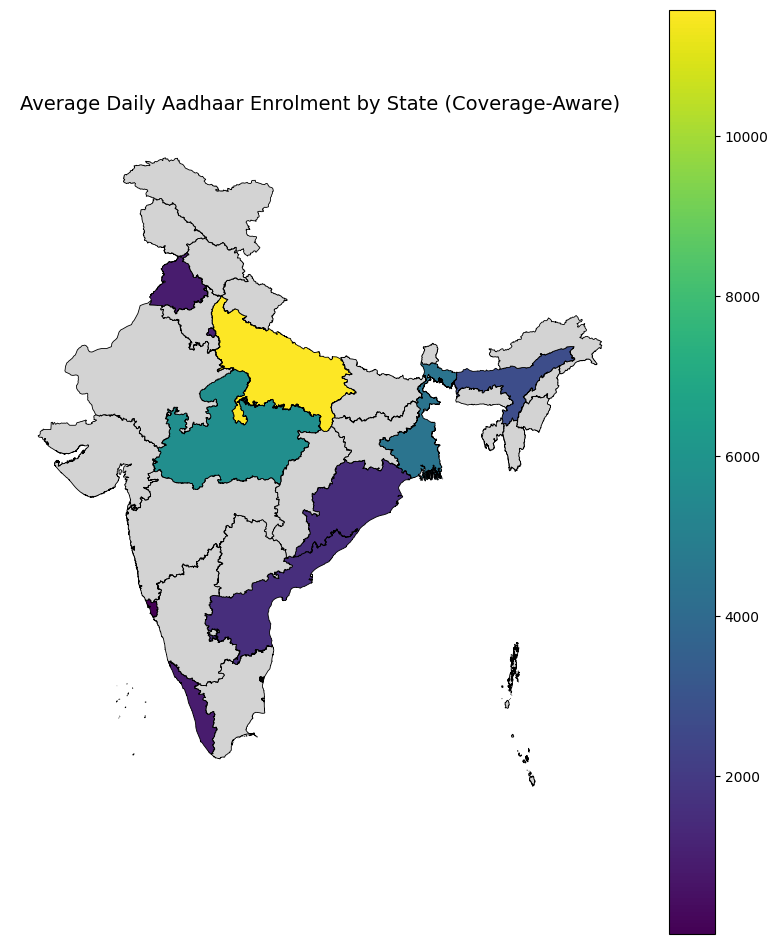

In [55]:
# 1. Load enrolment data
df = pd.read_csv("final_aadhar_data_cleaned.csv", parse_dates=["date"])

# 2. Standardize state names
df = standardize_state_names(df)

# 3. Aggregate to state level
state_metrics = aggregate_state_average_daily_enrolment(df)

# 4. Load India state boundaries
india_states_gdf = load_india_state_boundaries(
    geojson_path="geoBoundaries-IND-ADM1.geojson",
    state_name_col="shapeName"
)

# 5. Merge metrics with geometry
geo_enrolment = merge_enrolment_with_geometry(
    india_states_gdf,
    state_metrics
)

# 6. Sanity checks
sanity_checks(geo_enrolment)

# 7. Plot choropleth
plot_india_state_enrolment_map(geo_enrolment)


In [56]:
df['month_name'].nunique()

9

In [57]:

total_rows = df.shape[0]
total_states = df['state'].nunique()
total_districts = df['district'].nunique()
total_pincodes = df['pincode'].nunique()
reported_days = df['date'].nunique()

print(f"Total Rows: {total_rows}")
print(f"Total States: {total_states}")
print(f"Total Districts: {total_districts}")
print(f"Total Pincodes: {total_pincodes}")
print(f"Reported Days: {reported_days}")



Total Rows: 1004432
Total States: 36
Total Districts: 801
Total Pincodes: 19457
Reported Days: 92


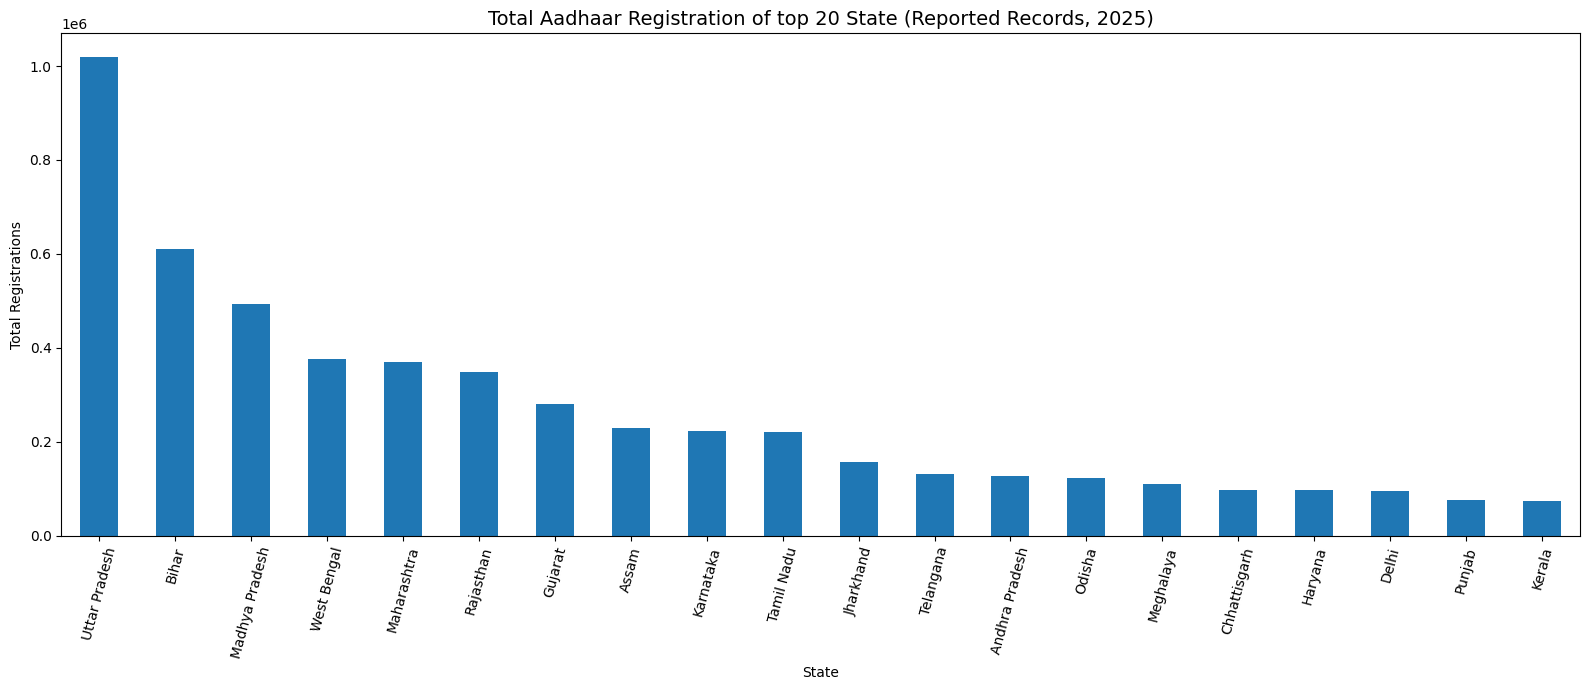

In [58]:
plt.figure(figsize=(16, 7))
df.groupby('state')['total_daily_enrolement'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

plt.title('Total Aadhaar Registration of top 20 State (Reported Records, 2025)', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Registrations')
plt.xticks(rotation=75)
plt.tight_layout()

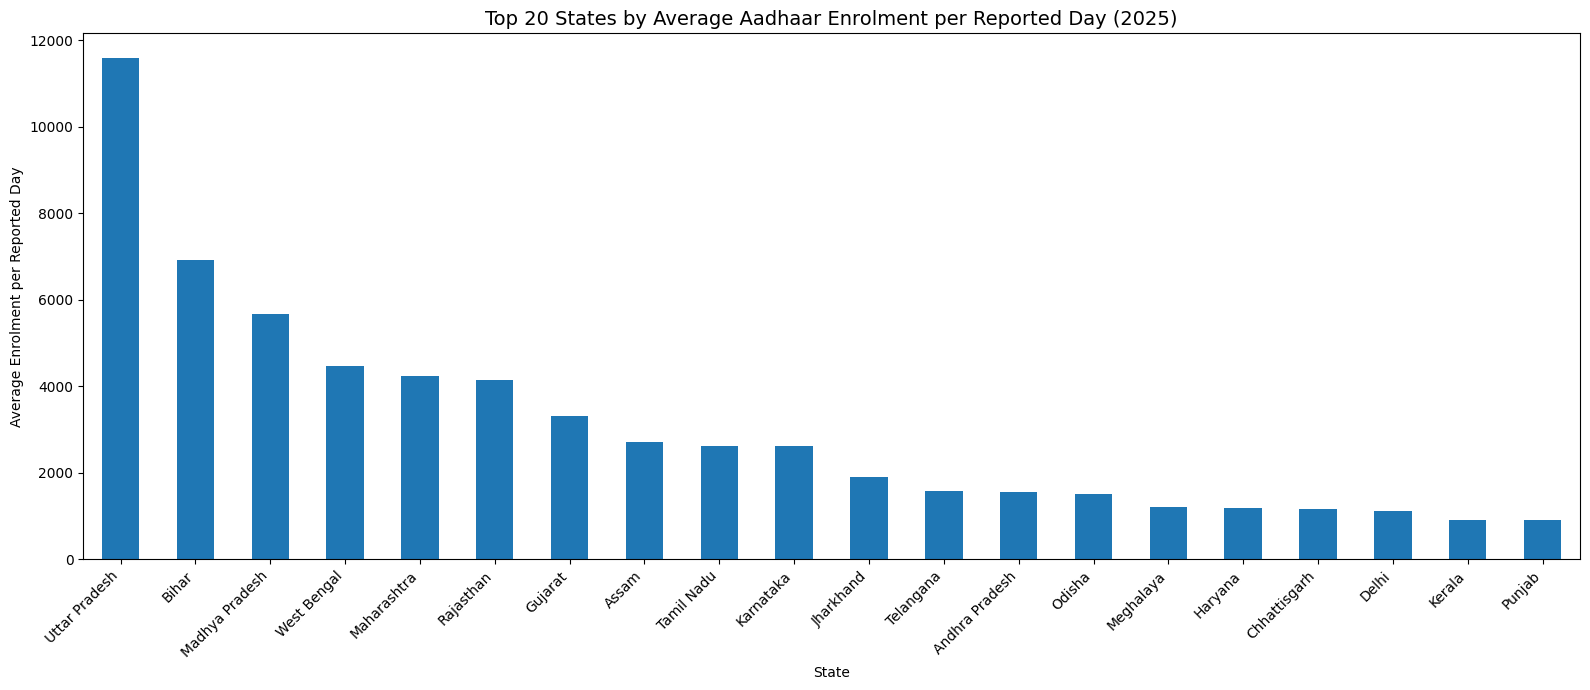

In [59]:
state_avg = (
    df.groupby(['state', 'date'])['total_daily_enrolement']
      .sum()
      .groupby('state')
      .mean()
      .sort_values(ascending=False)
      .head(20)
)

plt.figure(figsize=(16, 7))
state_avg.plot(kind='bar')

plt.title('Top 20 States by Average Aadhaar Enrolment per Reported Day (2025)', fontsize=14)
plt.xlabel('State')
plt.ylabel('Average Enrolment per Reported Day')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [60]:
national_daily = (
    df.groupby('date')['total_daily_enrolement']
      .sum()
)

national_daily.describe()


count        92.000000
mean      59018.097826
std       74059.096646
min          67.000000
25%       26132.000000
50%       49085.000000
75%       70562.250000
max      616868.000000
Name: total_daily_enrolement, dtype: float64

In [61]:
national_daily.sort_values(ascending=False).head(20)
# generally enrollment are hieghest on 1st of every month of summer months 
# 2025-07-01    616868
# 2025-04-01    257438
# 2025-06-01    215734
# 2025-05-01    183616


date
2025-07-01    616868
2025-04-01    257438
2025-06-01    215734
2025-05-01    183072
2025-12-15    138704
2025-12-31    125358
2025-11-15    119844
2025-10-30    116450
2025-10-17    115756
2025-11-19    114879
2025-12-22    109175
2025-11-02     99903
2025-09-09     88380
2025-09-10     84216
2025-09-08     83218
2025-09-12     78752
2025-09-02     76398
2025-11-05     75487
2025-09-01     74891
2025-10-13     74739
Name: total_daily_enrolement, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004432 entries, 0 to 1004431
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   date                    1004432 non-null  datetime64[ns]
 1   state                   1004432 non-null  object        
 2   pincode                 1004432 non-null  int64         
 3   district                1004432 non-null  object        
 4   age_0_5                 1004432 non-null  int64         
 5   age_5_17                1004432 non-null  int64         
 6   age_18_greater          1004432 non-null  int64         
 7   total_daily_enrolement  1004432 non-null  int64         
 8   day                     1004432 non-null  int64         
 9   day_name                1004432 non-null  object        
 10  month_name              1004432 non-null  object        
 11  state_clean             986046 non-null   object        
dtypes: datetime64[

In [63]:
df['day'] = df['date'].dt.day


In [64]:
age_totals = df[['age_0_5','age_5_17','age_18_greater']].sum()
age_share = age_totals / age_totals.sum()

age_totals, age_share


(age_0_5           3542135
 age_5_17          1719435
 age_18_greater     168095
 dtype: int64,
 age_0_5           0.652367
 age_5_17          0.316674
 age_18_greater    0.030959
 dtype: float64)

In [65]:
daily_active_pincodes = (
    df.groupby('date')['pincode']
      .nunique()
)

daily_avg_enrolment_per_pincode = (
    national_daily / daily_active_pincodes
)

daily_avg_enrolment_per_pincode.describe()


count     92.000000
mean      30.999546
std       84.493986
min        1.103410
25%        3.514141
50%        4.427355
75%        5.834620
max      521.003378
dtype: float64

In [66]:
df['month_name'] = df['date'].dt.month_name()


In [67]:
df.head()

,date,state,pincode,district,age_0_5,age_5_17,age_18_greater,total_daily_enrolement,day,day_name,month_name,state_clean
0,2025-09-01,Andaman and Nicobar Islands,744101,andamans,0,1,0,1,1,Monday,September,NaN
1,2025-09-01,Andaman and Nicobar Islands,744107,andamans,1,0,0,1,1,Monday,September,NaN
2,2025-09-02,Andaman and Nicobar Islands,744107,andamans,1,0,0,1,2,Tuesday,September,NaN
3,2025-09-04,Andaman and Nicobar Islands,744103,andamans,1,0,0,1,4,Thursday,September,NaN
4,2025-09-04,Andaman and Nicobar Islands,744105,andamans,1,0,0,1,4,Thursday,September,NaN


In [68]:
pd.set_option('display.max_rows', 80)

In [69]:
new_df = df.groupby('state', as_index=False).agg(district_count=('district', 'nunique'))

In [70]:
actual_districts_map = {
    "Andaman and Nicobar Islands": 3,
    "Andhra Pradesh": 26,
    "Arunachal Pradesh": 27,
    "Assam": 35,
    "Bihar": 38,
    "Chandigarh": 1,
    "Chhattisgarh": 33,
    "DNH and Daman and Diu": 3,
    "Delhi": 11,
    "Goa": 2,
    "Gujarat": 34,
    "Haryana": 22,
    "Himachal Pradesh": 12,
    "Jammu and Kashmir": 20,
    "Jharkhand": 24,
    "Karnataka": 31,
    "Kerala": 14,
    "Ladakh": 2,
    "Lakshadweep": 1,
    "Madhya Pradesh": 55,
    "Maharashtra": 36,
    "Manipur": 16,
    "Meghalaya": 12,
    "Mizoram": 11,
    "Nagaland": 17,
    "Odisha": 30,
    "Puducherry": 2,
    "Punjab": 23,
    "Rajasthan": 41,
    "Sikkim": 6,
    "Tamil Nadu": 38,
    "Telangana": 33,
    "Tripura": 8,
    "Uttar Pradesh": 75,
    "Uttarakhand": 13,
    "West Bengal": 23
}


In [71]:
new_df['actual_districts'] = new_df['state'].map(actual_districts_map)
new_df['difference'] = new_df['district_count'] - new_df['actual_districts']
new_df

,state,district_count,actual_districts,difference
0,Andaman and Nicobar Islands,4,3,1
1,Andhra Pradesh,37,26,11
2,Arunachal Pradesh,25,27,-2
3,Assam,37,35,2
4,Bihar,40,38,2
5,Chandigarh,2,1,1
6,Chhattisgarh,35,33,2
7,DNH and Daman and Diu,3,3,0
8,Delhi,13,11,2
9,Goa,3,2,1


In [72]:
district_fix = {
    'warangal urban': 'hanumakonda',
    'warangal rural': 'warangal'
}

df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(district_fix)
)

In [73]:
district_fix = {
    'north cachar hills': 'dima hasao',
    'bajali': 'barpeta'
}

df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(district_fix)
)

In [74]:
district_fix = {
    'pashchimi singhbhum': 'west singhbhum',
    'purbi singhbhum': 'east singhbhum',
    'east nimar': 'khandwa',
    'west nimar': 'khargone',
    'pondicherry': 'puducherry',
    'sonapur': 'sonepur',
    'subarnapur': 'sonepur',
    'jyotiba phule nagar': 'amroha',
    'mahrajganj': 'maharajganj',

}

df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(district_fix)
)


In [75]:
district_fix = {
    'najafgarh': 'south west delhi'



}

df['district'] = (
    df['district']
    .str.lower()
    .str.strip()
    .replace(district_fix)
)

In [76]:
df.loc[
    df['district'].str.lower().str.strip() == 'kamrup',
    'state'
] = 'Assam'


In [77]:
df[df['state'] == 'Delhi']['district'].unique()

array(['central delhi', 'east delhi', 'south west delhi', 'new delhi',
       'north delhi', 'north east', 'north east delhi',
       'north west delhi', 'shahdara', 'south delhi', 'south east delhi',
       'west delhi'], dtype=object)

In [78]:
df[df['state'] == 'West Bengal']['district'].unique()

array(['hooghly', 'howrah', 'north 24 parganas', 'south 24 parganas',
       'alipurduar', 'bankura', 'burdwan', 'birbhum', 'cooch behar',
       'dakshin dinajpur', 'darjeeling', 'dinajpur dakshin',
       'dinajpur uttar', 'east medinipur', 'jalpaiguri', 'jhargram',
       'kolkata', 'kalimpong', 'malda', 'medinipur', 'medinipur west',
       'murshidabad', 'nadia', 'uttar dinajpur', 'paschim bardhaman',
       'west medinipur', 'purba bardhaman', 'purulia', 'south dinajpur'],
      dtype=object)

In [79]:
df['district'].nunique()

788

In [80]:
telangana_districts = [
    'adilabad',
    'hyderabad',
    'rangareddy',
    'karimnagar',
    'khammam',
    'mahbubnagar',
    'medak',
    'nalgonda',
    'nizamabad',
    'warangal'
]
df.loc[
    df['district'].str.lower().isin(telangana_districts),
    'state'
] = 'Telangana'

In [81]:
df.shape

(1004432, 12)

In [82]:
import pandas as pd

df_cleaned = pd.read_csv("aadhar_cleaned_v_final.csv")
df_uncleaned = pd.read_csv("uncleaned_aadhar_data.csv")


In [83]:
state_map = {
    # West Bengal
    "WEST BENGAL": "West Bengal",
    "WESTBENGAL": "West Bengal",
    "West Bangal": "West Bengal",
    "West bengal": "West Bengal",
    "west Bengal": "West Bengal",
    "Westbengal": "West Bengal",
    "West  Bengal" : "West Bengal",
    # Odisha
    "ODISHA": "Odisha",
    "Orissa": "Odisha",

    # Andhra Pradesh
    "andhra pradesh": "Andhra Pradesh",

    # J&K
    "Jammu & Kashmir": "Jammu and Kashmir",
    "Jammu And Kashmir": "Jammu and Kashmir",

    # UT merge
    "Dadra & Nagar Haveli": "DNH and Daman and Diu",
    "Dadra and Nagar Haveli": "DNH and Daman and Diu",
    "Daman & Diu": "DNH and Daman and Diu",
    "Daman and Diu": "DNH and Daman and Diu",
    "The Dadra And Nagar Haveli And Daman And Diu": "DNH and Daman and Diu",
     "Dadra and Nagar Haveli and Daman and Diu"   :"DNH and Daman and Diu" ,
    # Puducherry
    "Pondicherry": "Puducherry",

    "Andaman & Nicobar Islands" : "Andaman and Nicobar Islands",
}       

df_uncleaned["state"] = df_uncleaned["state"].replace(state_map)

In [84]:
uncleaned_district_counts = (
    df_uncleaned
    .groupby('state')['district']
    .nunique()
    .reset_index(name='districts_uncleaned')
)


cleaned_district_counts = (
    df_cleaned
    .groupby('state')['district']
    .nunique()
    .reset_index(name='districts_cleaned')
)


In [85]:
district_comparison = (
    uncleaned_district_counts
    .merge(cleaned_district_counts, on='state', how='outer')
    .fillna(0)
)

district_comparison[['districts_uncleaned', 'districts_cleaned']] = (
    district_comparison[['districts_uncleaned', 'districts_cleaned']]
    .astype(int)
)



In [86]:
district_comparison['districts_reduced'] = (
    district_comparison['districts_uncleaned']
    - district_comparison['districts_cleaned']
)

district_comparison['reduction_pct'] = (
    district_comparison['districts_reduced']
    / district_comparison['districts_uncleaned']
    * 100
).round(2)



In [87]:
actual_districts_df = (
    pd.DataFrame.from_dict(
        actual_districts_map,
        orient='index',
        columns=['official_district_count']
    )
    .reset_index()
    .rename(columns={'index': 'state'})
)

district_comparison = district_comparison.merge(
    actual_districts_df,
    on='state',
    how='left'
)


In [88]:
district_comparison_sorted = (
    district_comparison
    .sort_values('districts_reduced', ascending=False)
    .reset_index(drop=True)
)

district_comparison_sorted



,state,districts_uncleaned,districts_cleaned,districts_reduced,reduction_pct,official_district_count
0,West Bengal,58,25,33,56.90,23.0
1,Karnataka,56,33,23,41.07,31.0
2,Andhra Pradesh,49,26,23,46.94,26.0
3,Maharashtra,53,36,17,32.08,36.0
4,Odisha,46,30,16,34.78,30.0
5,Uttar Pradesh,89,75,14,15.73,75.0
6,Jharkhand,35,24,11,31.43,24.0
7,Bihar,48,38,10,20.83,38.0
8,Telangana,42,33,9,21.43,33.0
9,Tamil Nadu,46,38,8,17.39,38.0


In [89]:
summary_df = pd.DataFrame({
    "Metric": [
        "Total unique districts (uncleaned)",
        "Total standardized districts (cleaned)",
        "Net reduction in district identifiers",
        "Reduction percentage"
    ],
    "Value": [
        df_uncleaned['district'].nunique(),
        df_cleaned['district'].nunique(),
        df_uncleaned['district'].nunique() - df_cleaned['district'].nunique(),
        round(
            (
                df_uncleaned['district'].nunique()
                - df_cleaned['district'].nunique()
            )
            / df_uncleaned['district'].nunique()
            * 100,
            2
        )
    ]
})

summary_df


,Metric,Value
0,Total unique districts (uncleaned),985.00
1,Total standardized districts (cleaned),772.00
2,Net reduction in district identifiers,213.00
3,Reduction percentage,21.62
